# Bandit Problem

In [10]:
# imports
from bandits import Bandit
import random
# Include your imports here, if any are used. 
import numpy as np
import matplotlib.pyplot as plt

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [46]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [12]:
bandits[0].pullLever()

2.3925224937890377

## Greedy algorithm Implementation

In [ ]:
def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    Q=np.array([0.0]*10)
    N=np.array([0]*10)
    rewards=[]
    
    for _ in range(1000):
        g=np.max(Q)
        gstar=(Q==g)
        x=np.random.choice(np.where(gstar)[0])
        r=bandits[x].pullLever()
        rewards.append(r)
        Q[x]=((Q[x])*(N[x])+r)/(N[x]+1)
        N[x]+=1
    return rewards

    
    pass

Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

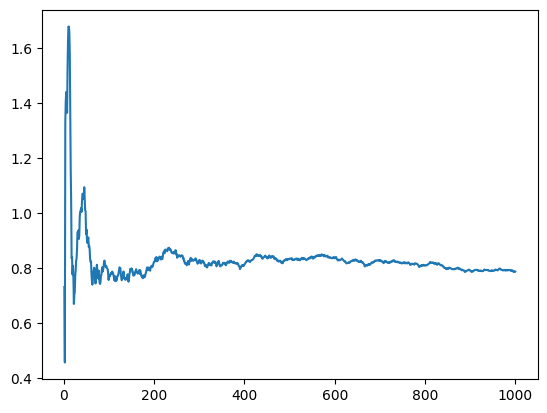

In [34]:
rewards=run_greedy()
x=np.arange(1000)
x+=1
y=np.array([0.0]*1000)
y[0]=rewards[0]
for i in range(1,1000):
    y[i]=(y[i-1]*(i)+rewards[i])/(i+1)
plt.plot(x,y)
plt.show()

## $\epsilon$-greedy Algorithm

In [35]:
def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    Q=np.array([0.0]*10)
    N=np.array([0]*10)
    rewards=[]
    
    for _ in range(1000):
        rg = np.random.default_rng()
        prob=rg.random()
        if(prob>epsilon):
            g=np.max(Q)
            gstar=(Q==g)
            x=np.random.choice(np.where(gstar)[0])
            r=bandits[x].pullLever()
            rewards.append(r)
            Q[x]=((Q[x])*(N[x])+r)/(N[x]+1)
            N[x]+=1
        else:
            x=rg.integers(10)
            r=bandits[x].pullLever()
            rewards.append(r)
            Q[x]=((Q[x])*(N[x])+r)/(N[x]+1)
            N[x]+=1


    return rewards
    pass

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

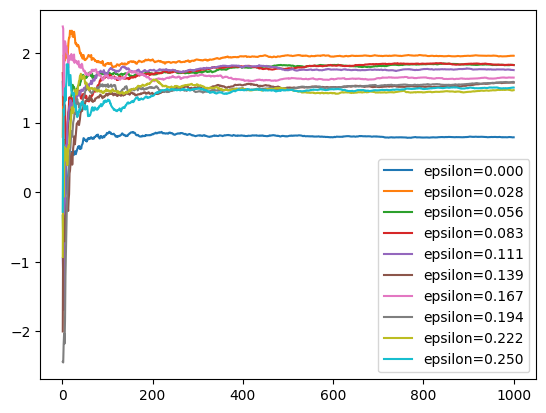

In [41]:
x=np.arange(1000)
x+=1
epsilon=np.linspace(0,0.25,10)
for k in epsilon:
    rewards=run_epsilon_greedy(k)
    y=np.array([0.0]*1000)
    y[0]=rewards[0]
    for i in range(1,1000):
        y[i]=(y[i-1]*(i)+rewards[i])/(i+1)
    plt.plot(x,y)
legender=[f"epsilon={epsilon[i]:.3f}" for i in range(10)]
plt.legend(legender)
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

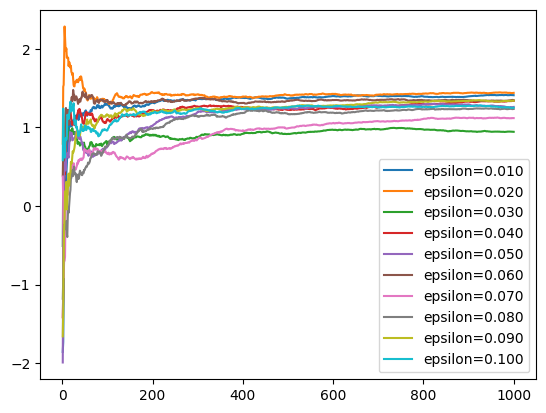

In [47]:
x=np.arange(1000)
x+=1
epsilon=np.linspace(0.01,0.1,10)
for k in epsilon:
    rewards=run_epsilon_greedy(k)
    y=np.array([0.0]*1000)
    y[0]=rewards[0]
    for i in range(1,1000):
        y[i]=(y[i-1]*(i)+rewards[i])/(i+1)
    plt.plot(x,y)
legender=[f"epsilon={epsilon[i]:.3f}" for i in range(10)]
plt.legend(legender)
plt.show()


## Optimistic Initial Values

In [49]:
def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here
    Q=np.array([10.0]*10)
    N=np.array([0]*10)
    rewards=[]
    
    for _ in range(1000):
        g=np.max(Q)
        gstar=(Q==g)
        x=np.random.choice(np.where(gstar)[0])
        r=bandits[x].pullLever()
        rewards.append(r)
        Q[x]=((Q[x])*(N[x])+r)/(N[x]+1)
        N[x]+=1
    return rewards
    # Return the reward from the bandits in a list
    pass

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

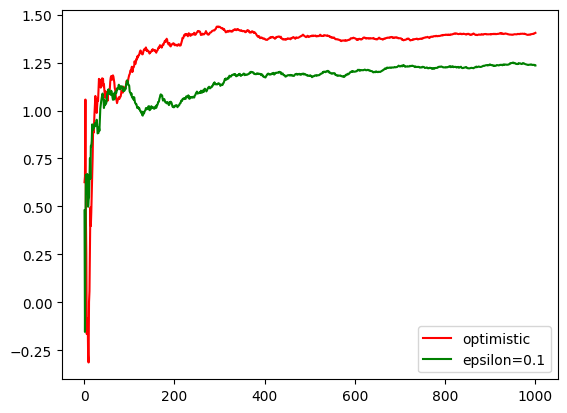

In [63]:
rewards=run_optimistic_greedy()
x=np.arange(1000)
x+=1
y=np.array([0.0]*1000)
y[0]=rewards[0]
for i in range(1,1000):
    y[i]=(y[i-1]*(i)+rewards[i])/(i+1)
plt.plot(x,y,color='red')
rewards=run_epsilon_greedy(0.1)
ydash=np.array([0.0]*1000)
y[0]=rewards[0]
for i in range(1,1000):
    y[i]=(y[i-1]*(i)+rewards[i])/(i+1)
plt.plot(x,y,color='green')
plt.legend(["optimistic","epsilon=0.1"])
plt.show()

## Upper Confidence Bound (UCB)

In [73]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    Q=np.array([0.0]*10)
    N=np.array([0]*10)
    rewards=[]
    
    for _ in range(1000):
        Qdash=np.array([0.0]*10)
        for i in range(10):
            if (N[i]==0):
                Qdash[i]=2**67
            else:
                Qdash[i]=(Q[i]+(c*(np.sqrt((np.log(_))/N[i]))))
        g=np.max(Qdash)
        gstar=(Qdash==g)
        x=np.random.choice(np.where(gstar)[0])
        r=bandits[x].pullLever()
        rewards.append(r)
        Q[x]=((Q[x])*(N[x])+r)/(N[x]+1)
        N[x]+=1
    return rewards
    pass

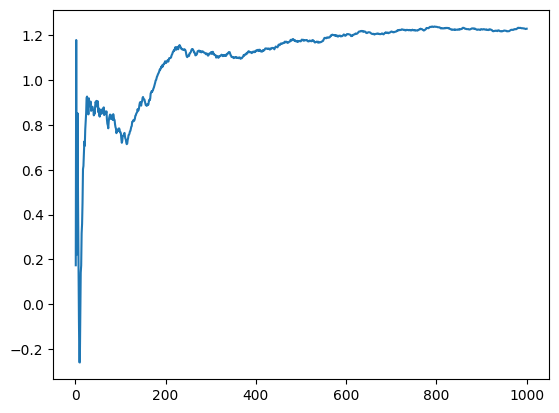

In [76]:
rewards=run_ucb(2)
x=np.arange(1000)
x+=1
y=np.array([0.0]*1000)
y[0]=rewards[0]
for i in range(1,1000):
    y[i]=(y[i-1]*(i)+rewards[i])/(i+1)
plt.plot(x,y)
plt.show()